In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_path = 'train'
val_path = 'validation'
test_path = 'test'

In [3]:
# Rescale pixel values to [0, 1]
train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

# Load images from folders
train_data = train_gen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

val_data = val_gen.flow_from_directory(
    val_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_data = test_gen.flow_from_directory(
    test_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [ ]:
print(train_data.class_indices)

In [ ]:
{'WithMask': 0, 'WithoutMask': 1}

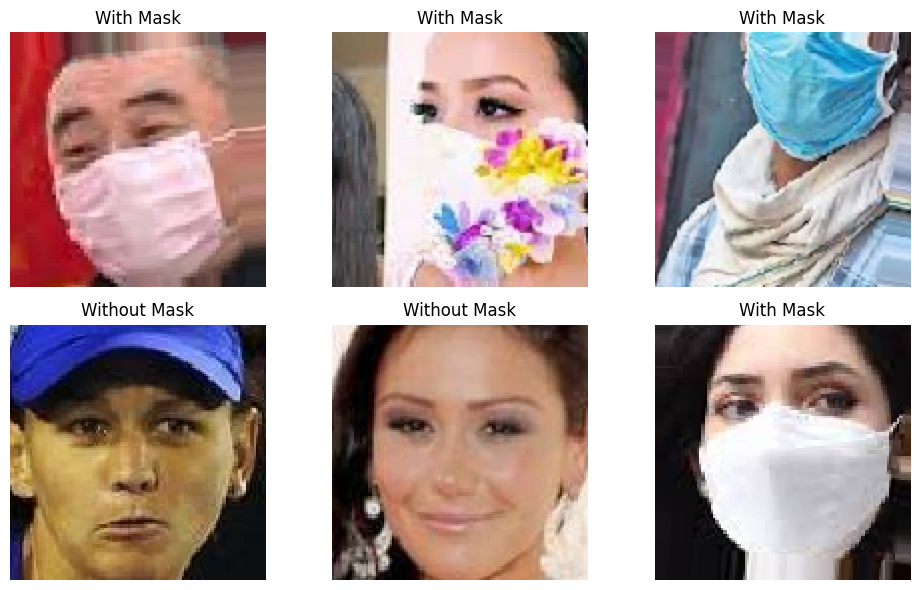

In [5]:
# Corrected visualization
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    # If class_indices says 'WithMask': 0, then label 0 = Mask
    plt.title("With Mask" if labels[i] == 0 else "Without Mask")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [7]:
# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

Epoch 1/10
313/313 [==============================] - 221s 701ms/step - loss: 0.1172 - accuracy: 0.9567 - val_loss: 0.0379 - val_accuracy: 0.9837
Epoch 2/10
313/313 [==============================] - 144s 460ms/step - loss: 0.0417 - accuracy: 0.9855 - val_loss: 0.0222 - val_accuracy: 0.9900
Epoch 3/10
313/313 [==============================] - 142s 453ms/step - loss: 0.0335 - accuracy: 0.9877 - val_loss: 0.0299 - val_accuracy: 0.9912
Epoch 4/10
313/313 [==============================] - 143s 458ms/step - loss: 0.0350 - accuracy: 0.9881 - val_loss: 0.0297 - val_accuracy: 0.9900
Epoch 5/10
313/313 [==============================] - 142s 454ms/step - loss: 0.0240 - accuracy: 0.9911 - val_loss: 0.0165 - val_accuracy: 0.9962
Epoch 6/10
313/313 [==============================] - 140s 448ms/step - loss: 0.0155 - accuracy: 0.9945 - val_loss: 0.0143 - val_accuracy: 0.9950
Epoch 7/10
313/313 [==============================] - 144s 458ms/step - loss: 0.0142 - accuracy: 0.9951 - val_loss: 0.0083 -

In [8]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.2f}")

31/31 [==============================] - 9s 291ms/step - loss: 0.0387 - accuracy: 0.9879
Test Accuracy: 0.99


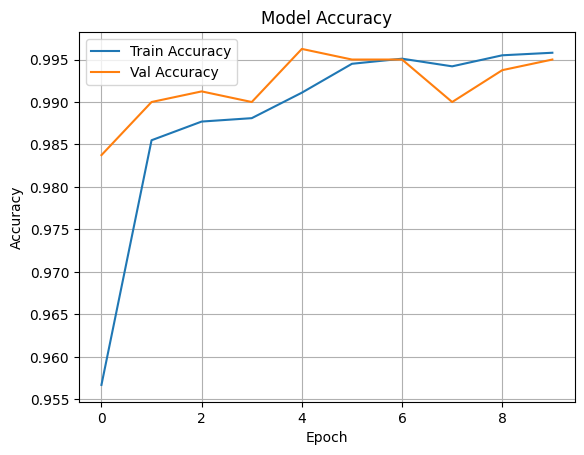

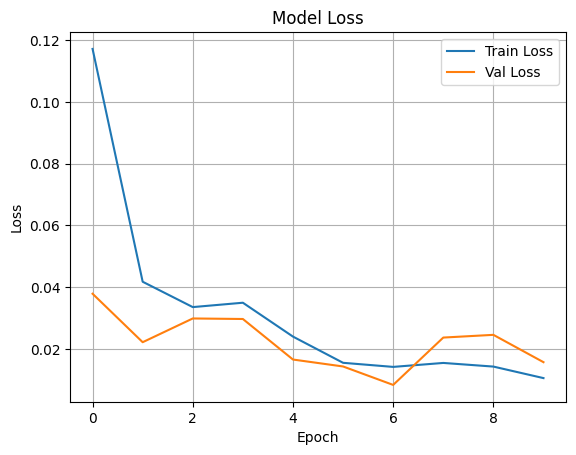

In [9]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"✅ Test Accuracy: {test_accuracy:.4f}")
print(f"📉 Test Loss: {test_loss:.4f}")

31/31 [==============================] - 4s 126ms/step - loss: 0.0387 - accuracy: 0.9879
✅ Test Accuracy: 0.9879
📉 Test Loss: 0.0387


In [11]:
model.save("face_mask_model.h5")
print("✅ Model saved as 'face_mask_model.h5'")

C:\Users\gedel\anaconda3\envs\myenv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


✅ Model saved as 'face_mask_model.h5'
